<h2>1. Importacion de Datos</h2>

In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#importando datos desde un archivo csv
path = "excel_file/automobileEDA.csv"
df = pd.read_csv(path)
df.head(10)


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


<h2>2. Analizando los Datos</h2>

In [38]:
#verificar el tipo de datos que estamos usando
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [39]:
#para ver el tipo de datos de una columna
df["peak-rpm"].dtypes

dtype('float64')

In [40]:
#se sirve para calcular la correlación entre los datos 
#df.corr()

In [41]:
#sirve para buscar la correlacion entre diferentes columnas
df[["bore","stroke", "compression-ratio", "horsepower"]].head(10)

,bore,stroke,compression-ratio,horsepower
0,3.47,2.68,9.0,111.0
1,3.47,2.68,9.0,111.0
2,2.68,3.47,9.0,154.0
3,3.19,3.40,10.0,102.0
4,3.19,3.40,8.0,115.0
5,3.19,3.40,8.5,110.0
6,3.19,3.40,8.5,110.0
7,3.19,3.40,8.5,110.0
8,3.13,3.40,8.3,140.0
9,3.50,2.80,8.8,101.0


(0.0, 53192.9089309502)

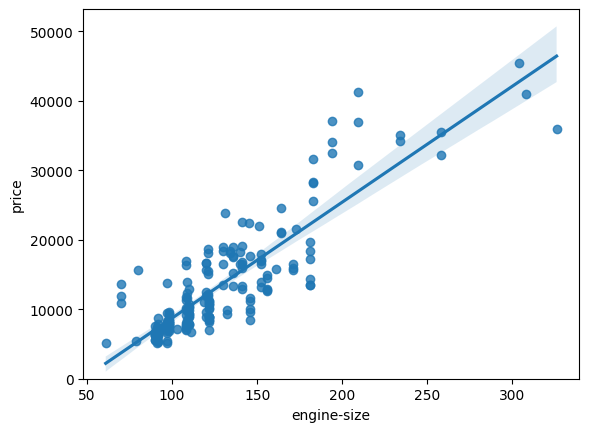

In [42]:
#Para predecir el precio segun el tamaño del motor
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [43]:
#Examinaremos la correlación entre el "engine-size" y el "price"
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

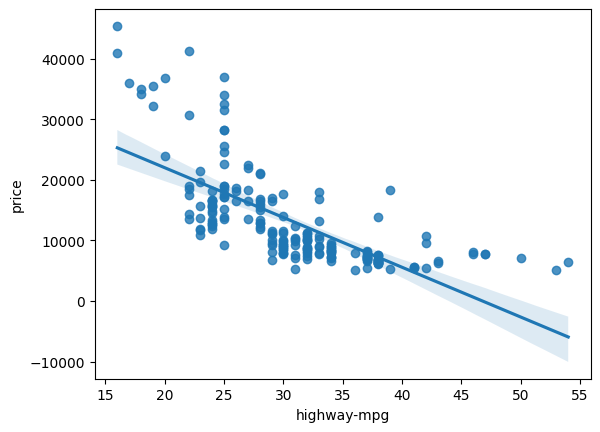

In [44]:
#Para predecir el "price" segun el "highway-mpg" (la regresión)
sns.regplot(x="highway-mpg", y="price", data=df)

In [45]:
#Examinamos la correlación entre el "highway-mpg" y el "price"
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='stroke', ylabel='price'>

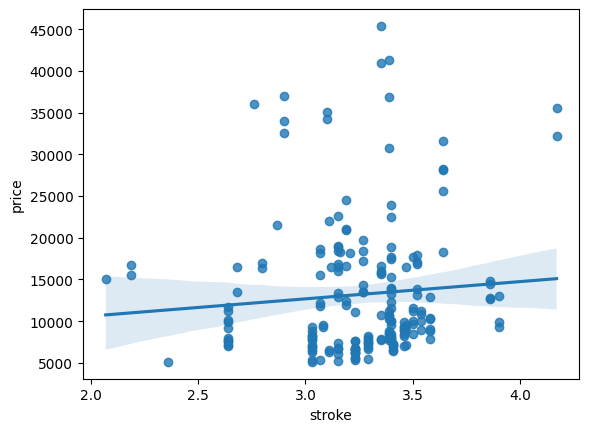

In [46]:
sns.regplot(x="stroke", y="price", data=df)

In [47]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='body-style', ylabel='price'>

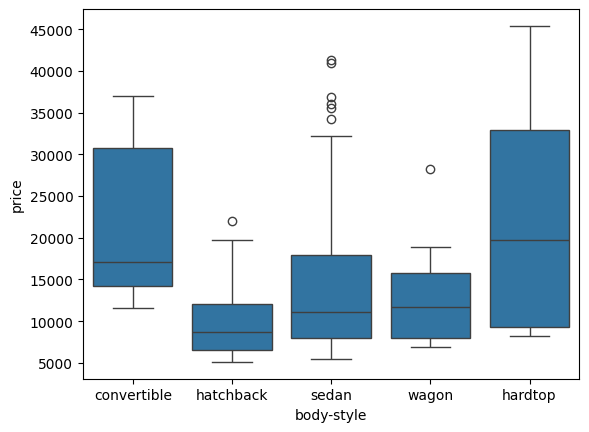

In [48]:
#verificamos la diferencion en la columna Price y Body-Style
sns.boxplot(x="body-style", y="price", data=df)
#plt.ylabel(0,)

<Axes: xlabel='engine-location', ylabel='price'>

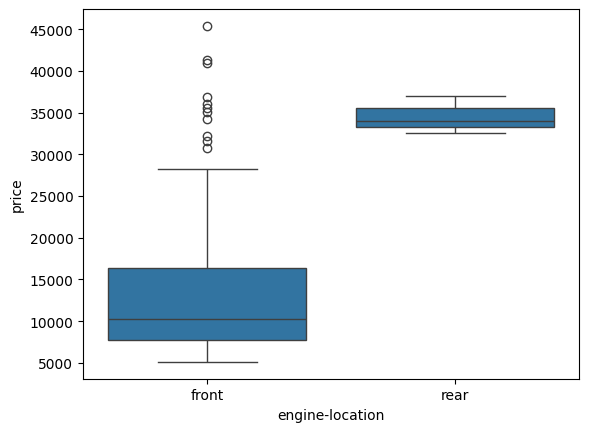

In [49]:
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

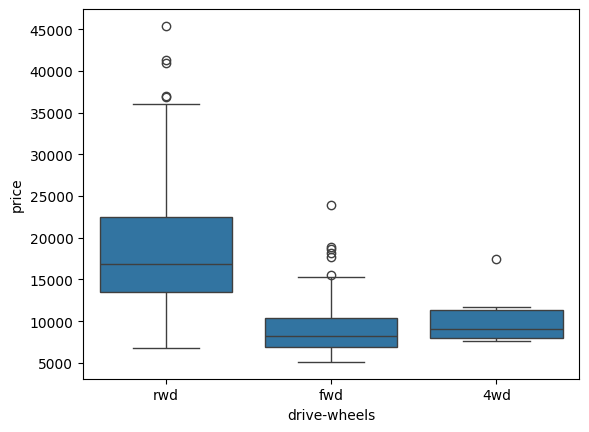

In [50]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<h2> 3. Analisis Estadistica y Descriptiva</h2>

In [51]:
df.describe(include=["object"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [52]:
#Para saber la cantidad de datos que tenemos en la columna "drive wheels"
df["drive-wheels"].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [53]:
#Para convertirlo en un dataframe 
df["drive-wheels"].value_counts().to_frame()


,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [54]:
#Cambiar el nombre de la columna
dwc = df['body-style'].value_counts().to_frame(name='Contar')
#dwc.rename(columns={'body-style' : 'style'}, inplace=True)
dwc.index.name = 'Style'
dwc

,Contar
Style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


In [55]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
#engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'location'
engine_loc_counts.head(10)

,count
location,
front,198
rear,3


In [56]:
df[df.price > 10000].head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


<h2>4. Agrupación Basica!</h2>

In [57]:
#Agrupar la columna "body-style" para ver los valores unicos
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [58]:
#Agrupar las columnas "Drive-Wheels", "Body-Style" y "Price" para ver el promedio del mejor drive wheel 
#Creamos una variable
df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one = df_group_one.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_group_one.head(10)


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [59]:
#Crear una tabla dinamica (Pivot Table)[.fillna(), se uso para reempalzar los valores nulos por cero]
td = df_group_one.pivot(index='drive-wheels', columns='body-style').fillna(0)
td

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [60]:
#Agrupar el promedio del 'Price' de los carros basandonos en el ''Body-Style'
new_test = df[['body-style', 'price']]
new_test = new_test.groupby(['body-style'], as_index=False).mean()
new_test

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


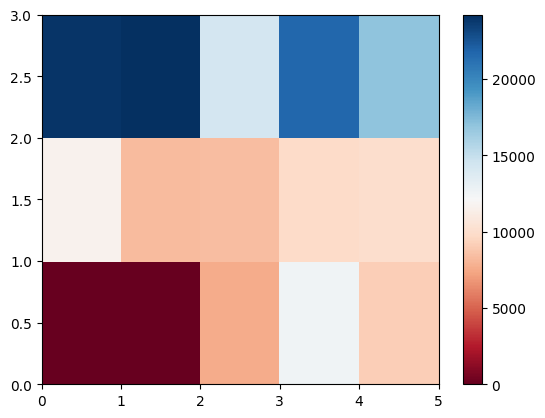

In [61]:
#visualizar la realacion entre "body-style" y "price"
plt.pcolor(td, cmap='RdBu')
plt.colorbar()
plt.show()


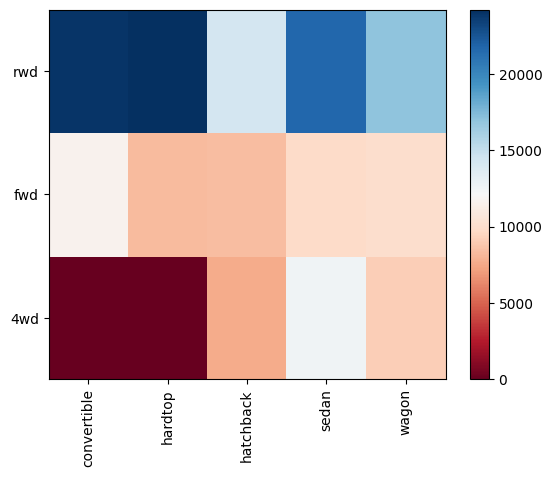

In [62]:
fig, ax = plt.subplots()
im = ax.pcolor(td, cmap='RdBu')

#nombrar las etiquetas
row_labels = td.columns.levels[1]
col_labels = td.index

#moviendo los puntos y las etiquetas al centro
ax.set_xticks(np.arange(td.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(td.shape[0]) + 0.5, minor=False)

#insertar las etiquetas
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotas las etiquetas si son muy largas
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2> 5. Correlación y Causalidad</h2>

In [63]:
#Calcular el "Pearson Correlation Coefficient" y la "P-value" entre Wheel-Base y Price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f'El coeficiente de la Correlación de Pearson es: {pearson_coef} y el P-Value de P es: {p_value}')

El coeficiente de la Correlación de Pearson es: 0.5846418222655081 y el P-Value de P es: 8.076488270732847e-20


In [64]:
#Calcular el "Pearson Correlation Coefficient" y la "P-value" entre normalized-losses y Price
pearson_coef, p_value = stats.pearsonr(df['normalized-losses'], df['price'])
print(f'El coeficiente de la Correlación de Pearson es: {pearson_coef} y el P-Value de P es: {p_value}')

El coeficiente de la Correlación de Pearson es: 0.1339987342927434 y el P-Value de P es: 0.0578974935270312


In [65]:
#Calcular el "Pearson Correlation Coefficient" y la "P-value" entre Length y Price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print(f'El coeficiente de la Correlación de Pearson es: {pearson_coef} y el P-Value de P es: {p_value}')

El coeficiente de la Correlación de Pearson es: 0.690628380448364 y el P-Value de P es: 8.016477466158899e-30


<h2>6. ANOVA: Análisis de Varianza </h2>

In [66]:
#Verificar si los diferentes DW impactan el precio, agrupamos la data:
group_test = df_group_one[['drive-wheels', 'price']].groupby(['drive-wheels'])
group_test.head()

,drive-wheels,price
0,4wd,7603.000000
1,4wd,12647.333333
2,4wd,9095.750000
3,fwd,11595.000000
4,fwd,8249.000000
5,fwd,8396.387755
6,fwd,9811.800000
7,fwd,9997.333333
8,rwd,23949.600000
9,rwd,24202.714286


In [67]:
df_group_one

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [69]:
#Obtener el valor de la nueva agrupacion
new_group = group_test.get_group('4wd')['price']
new_group

C:\Users\nandy\AppData\Local\Temp\ipykernel_10752\4263547084.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  new_group = group_test.get_group('4wd')['price']


0     7603.000000
1    12647.333333
2     9095.750000
Name: price, dtype: float64

In [70]:
#creación del ANOVA
f_val, p_val = stats.f_oneway(group_test.get_group('fwd')['price'], group_test.get_group('rwd')['price'],group_test.get_group('4wd')['price'])
print(f'Resultado del ANOVA es: F= {f_val} y P= {p_val}')

Resultado del ANOVA es: F= 17.54495590883977 y P= 0.000536541192542127


C:\Users\nandy\AppData\Local\Temp\ipykernel_10752\280003517.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(group_test.get_group('fwd')['price'], group_test.get_group('rwd')['price'],group_test.get_group('4wd')['price'])


In [71]:
#verifición del ANOVA para cada una de las variables [fwd y rwd]
f_val, p_val = stats.f_oneway(group_test.get_group('fwd')['price'], group_test.get_group('rwd')['price'])
print(f'Resultado del ANOVA es: F= {f_val} y P= {p_val}')

Resultado del ANOVA es: F= 26.75473847377244 y P= 0.0008505298615827272


C:\Users\nandy\AppData\Local\Temp\ipykernel_10752\2162656333.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(group_test.get_group('fwd')['price'], group_test.get_group('rwd')['price'])


In [72]:
#verifición del ANOVA para cada una de las variables [fwd y 4wd]
f_val, p_val = stats.f_oneway(group_test.get_group('fwd')['price'], group_test.get_group('4wd')['price'])
print(f'Resultado del ANOVA es: F= {f_val} y P= {p_val}')

Resultado del ANOVA es: F= 0.015958539708919313 y P= 0.9035999352040226


C:\Users\nandy\AppData\Local\Temp\ipykernel_10752\103357348.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(group_test.get_group('fwd')['price'], group_test.get_group('4wd')['price'])


In [73]:
#verifición del ANOVA para cada una de las variables [rwd y 4wd]
f_val, p_val = stats.f_oneway(group_test.get_group('rwd')['price'], group_test.get_group('4wd')['price'])
print(f'Resultado del ANOVA es: F= {f_val} y P= {p_val}')

Resultado del ANOVA es: F= 13.603994177561603 y P= 0.010228629764546682


C:\Users\nandy\AppData\Local\Temp\ipykernel_10752\3718728845.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(group_test.get_group('rwd')['price'], group_test.get_group('4wd')['price'])


In [1]:
import pandas as pd

certificates_earned = pd.Series(
    [8, 2, 5, 6],
    index=['Tom', 'Kris', 'Ahmad', 'Beau']
)

print(certificates_earned)

Tom      8
Kris     2
Ahmad    5
Beau     6
dtype: int64


In [4]:
#certificates_earned[0] by index
certificates_earned.iloc[0] #by sequential position

C:\Users\nandy\AppData\Local\Temp\ipykernel_20524\336673843.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  certificates_earned[0]


np.int64(8)

In [9]:
import pandas as pd


""" certificates_earned = pd.DataFrame({
    'Certificates': [8, 2, 5, 6],
    'Time (in months)': [16, 5, 9, 12]
})
names = ['Tom', 'Kris', 'Ahmad', 'Beau']

certificates_earned.index = names
longest_streak = pd.Series([13, 11, 9, 7], index=names)
certificates_earned['Longest streak'] = longest_streak

print(certificates_earned) """

" certificates_earned = pd.DataFrame({\n    'Certificates': [8, 2, 5, 6],\n    'Time (in months)': [16, 5, 9, 12]\n})\nnames = ['Tom', 'Kris', 'Ahmad', 'Beau']\n\ncertificates_earned.index = names\nlongest_streak = pd.Series([13, 11, 9, 7], index=names)\ncertificates_earned['Longest streak'] = longest_streak\n\nprint(certificates_earned) "

<Axes: >

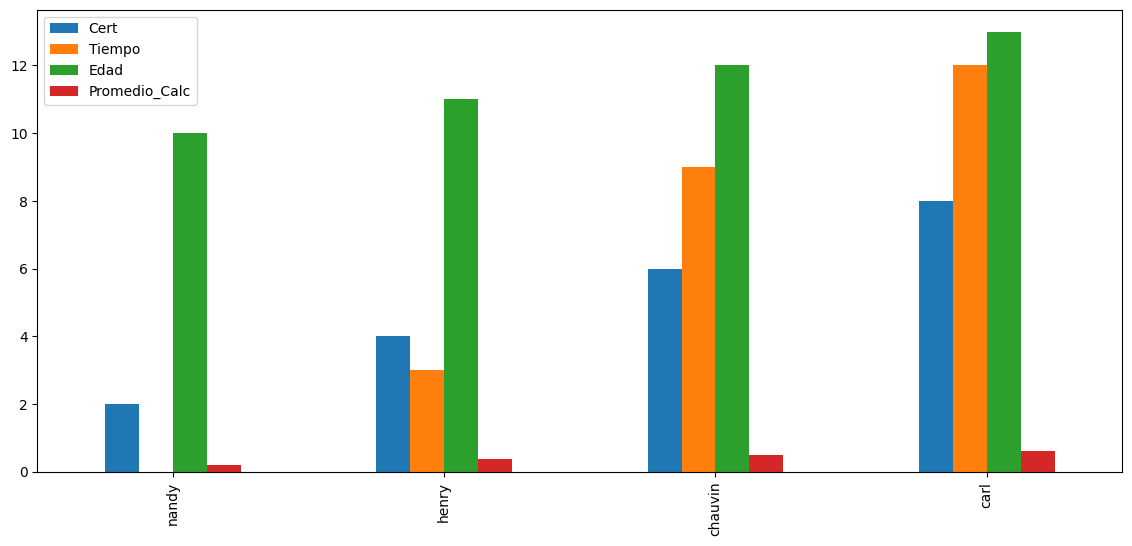

In [5]:
import pandas as pd

ced = pd.DataFrame({
    'Cert': [2,4,6,8],
    'Tiempo': [0,3,9,12]
})
ced

name = ['nandy', 'henry', 'chauvin', 'carl']

ced.index = name
new_col = pd.Series([10,11,12,13], index=name)
ced['Edad'] = new_col
ced['Promedio_Calc'] = ced['Cert'] / ced['Edad']
ced.plot(kind='bar', figsize=(14,6))

In [ ]:
#ced.rename(columns={'Tiempo':'Tiempo (en Mes)'})
ced['Tiempo'].replace('Tiempo (en Mes)')
ced.to_frame()

In [ ]:
pd.read_excel?

In [13]:
l = {'a':1,
    'b': '1,2'
    }
for key, values in l.items():
    print(f'This is the key: "{key}", and this is the value: "{values}" of the Dictionnary "L"')

This is the key: "a", and this is the value: "1" of the Dictionnary "L"
This is the key: "b", and this is the value: "1,2" of the Dictionnary "L"


In [14]:
import pandas as pd
import numpy as np

s = pd.Series(['a', 3, np.nan, 1, np.nan])

print(s.notnull().sum())

3


In [15]:
b = np.array([[1.0,2.0,3.0],[3.0,4.0,5.0]])
print(b)

[[1. 2. 3.]
 [3. 4. 5.]]


In [16]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [53]:
a[:,2] = 20
a

array([[ 1,  2, 20,  4,  5],
       [ 6,  7, 20,  9, 10]])

In [54]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(np.full_like(a, 100))

[[100 100 100 100 100]
 [100 100 100 100 100]]


In [74]:
output = np.zeros((7,7))

z = np.ones((5, 5))
z[2, 2] = 5

output[1:-1, 1:-1] = z
output

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 5., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [78]:
a = np.array(([1, 2, 3, 4, 5], [6, 7, 8, 9, 10]))
b = np.max(a, axis=1).sum()
b

np.int64(15)